### 本课提纲
- 什么是最优化
- 梯度下降算法
- 遗传算法
- 练习

### 1. 什么是最优化

生活中我们都想把事情做的最好，比如做菜的时候，我们的目标是让菜的味道最好，假设简化我们可以控制的因素，只保留放盐这一个因素，盐多了味道会太咸，盐太少味道会太淡，所以我们要找一个最适合的放盐量，使菜的味道最好。这时候，可以将菜的味道看做是放盐量的函数。简单来讲，最优化就是找出函数的极值。

假设有一个普通的二次方函数，例如 $y=x^2$,我们希望知道它的最小值在哪里。从下面的图可以看到，当x取0的时候，这个函数取值最小。更形象的解释就是，如果把这个函数看作是一座山，有一个生活在这座山上的小兔子，小兔子希望能跑到山的最低洼地方去，但是它的视力又不好，一眼看不到最低处，只能看到眼前的东西，那有什么办法可以到达最低处呢？

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

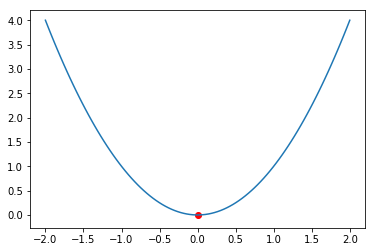

In [35]:
x = np.linspace(-2,2,100)
y = x**2
plt.plot(x,y);
plt.scatter(0,0,color='red');

### 2. 梯度下降算法

如果小兔子看不到远处，但是可以看到近处，那么它会知道在它现在所处的这个地方，地势的高低走向是怎么样的。因为它生活在这个二维的山上，它只有两个方向可以选择和观察，向左走或是向右走。它可以观察到近处左边的地势和右边的地势。可以这样来思考一下，如果左边的地势比右边的地势低，那么有可能低洼处就在左边某个地方，所以从贪心算法的思路来看，我们就以当前位置的局部地势来判断，往低处走。往左走了一步之后，在以当前位置观察局部的地势，再进行判断决策。就这样循环往复，最终会找到山的最低处。

如果要编程来模仿小兔子的行动决策，我们还需要明确两个具体的东西，一是如何来判断局部的地势以决定走的方向，二是如何决定走的步子大小。对于第一个问题，我们可以联想到斜率这个概念，如果在山的某一个位置上，或者说在函数的某个点的位置上，这个点对应的斜率是可以算出来的，如果斜率是正数，说明左边比右边低，方向选择上就应该往左走，反之，如果斜率是负数，说明左边比右边高，方向选择上应该往右走。斜率在数学上也称之为导数或者梯度。对于第二个问题，可以想像的到，如果步子小，我们需要更多的步数才走到底部，如果步子大，可能需要较少的步数，但是呢，步子越大，可能会越过底部，走过头了。所以通常我们会设置一个谨慎的步长。

如果用一个公式来描述上述的思路就是： $x = x - rate\times gx$

x是当前位置，rate是步长，gx是当前位置的斜率，在每一步，我们会算出当前位置的斜率gx，当gx为正也就是斜率为正，我们应该往左走，自然就是在当前位置上做减法，x就会变小；如果gx为负也就是斜率为负，和前面那个负号抵消后成为一个加法，x就会增加，就是往右走。

In [66]:
def min_gred(x_start, rate, num, f,g):
    x = x_start
    for n in range(num):
        gx = g(x)
        y = f(x)
        x = x - rate*gx # 梯度下降
        print("X：{x:.2f}, Y：{y:.2f}，gx：{gx:.2f}".format(x=x, y=y,gx=gx))
        if abs(gx)<0.0001:
            break
    return x
        

下面我们来解释一下这个代码的含义，这个函数代码是上述的梯度下降思路来求某个函数的最小值。输入参数有四个，x_start表示初始点的位置，也就是小兔子一开始的位置，rate是步长设置，num是走的步数，f是需要求最小值的那个函数，也就是山的形状，g是f的梯度函数，也就是对应山的每个位置的斜率可以通过g算出来。

在进入循环之后，每一步，我们会算出当前位置的斜率，存在gx中，再算出当前的高度y，再用一个梯度下降公式去修正x的值，因为gx为正也就是斜率为正，我们应该往左走，自然就是在当前位置上做减法，如果gx为负也就是斜率为负，和前面那个负号抵消后成为一个加法，x就会增加，就是往右走。

同时为了显示每一步的信息，我们打印出这几个变量的值，以方便我们调试和理解，最后有一个条件判断，当斜率非常小的时候，说明地势已经很平了，可能已经到最低点了，可以提前终止。

In [59]:
f = lambda x:x**2
g = lambda x: 2*x

为了计算平方函数的最小值，我们需要定义这个二次方函数，存放在f中，同时定义好二次方函数对应的梯度函数。梯度函数g就是对f的求导结果。

In [65]:
min_gred(2,0.1, 10,f,g)

X：1.60, Y：4.00，gx：4.00
X：1.28, Y：2.56，gx：3.20
X：1.02, Y：1.64，gx：2.56
X：0.82, Y：1.05，gx：2.05
X：0.66, Y：0.67，gx：1.64
X：0.52, Y：0.43，gx：1.31
X：0.42, Y：0.27，gx：1.05
X：0.34, Y：0.18，gx：0.84
X：0.27, Y：0.11，gx：0.67
X：0.21, Y：0.07，gx：0.54


0.21474836480000006

我们来运行这个代码，如果初始点为2，步长为0.1，走10步，我们会发现由于每一步走的比较小，最后我们走到了x=0.21这个位置，此时比较靠近0了，但是并未达到最小值。不过从打印的信息中可以看到，x是慢慢靠近0的，而且y也是在减小的，说明走的方向是对的，只不过还没走到。这时我们可以调大步数，或是调大步长。

In [71]:
min_gred(2,0.3, 10,f,g)

X：0.80, Y：4.00，gx：4.00
X：0.32, Y：0.64，gx：1.60
X：0.13, Y：0.10，gx：0.64
X：0.05, Y：0.02，gx：0.26
X：0.02, Y：0.00，gx：0.10
X：0.01, Y：0.00，gx：0.04
X：0.00, Y：0.00，gx：0.02
X：0.00, Y：0.00，gx：0.01
X：0.00, Y：0.00，gx：0.00
X：0.00, Y：0.00，gx：0.00


0.00020971520000000014

将步长调整到0.3之后，发现x已经非常接近0了，目标达到了。

In [81]:
min_gred(2,1.1, 10,f,g)

X：-2.40, Y：4.00，gx：4.00
X：2.88, Y：5.76，gx：-4.80
X：-3.46, Y：8.29，gx：5.76
X：4.15, Y：11.94，gx：-6.91
X：-4.98, Y：17.20，gx：8.29
X：5.97, Y：24.77，gx：-9.95
X：-7.17, Y：35.66，gx：11.94
X：8.60, Y：51.36，gx：-14.33
X：-10.32, Y：73.95，gx：17.20
X：12.38, Y：106.49，gx：-20.64


12.383472844800014

当我们将步长调整到1.1之后，发现不仅没有接近最小值，反而越走越远。这是因为步长设置的过大，出现震荡现象。

小结：梯度下降是一种寻找函数极值的思路，它需要知道三个因素后进行循环计算，以逼近极值，这三个因素分别是初始的位置，函数的导数，步长。如果步长设置的过小，会花费很多步数才会到达极值，如果步长设置过大，会导致无法到达极值位置。

### 3. 遗传算法

遗传算法是受到大自然规律的启发，如果一个生物种群要在自然界生存下去，它必须将优秀的个体遗传到下一代。以长颈鹿这个种群为例，因为自然竞争，低处的植物被很多动物吃掉了，为了生存，它们的身高需要越来越高，否则无法吃到高处的食物。上一代的长颈鹿产生下一代时，下一代的身高不会都能够到高处的食物，那些身高不足的下一代必然容易夭折早亡，那些有足够身高的下一代自然容易存活，并给再下一代传续它们的身高基因。

从自然界的规律出发，我们可以将二次方函数想像成一个生态环境，只有在低洼处生活的小兔子才有水喝，才能够生存下来。假设一开始有一群小兔子，随机分散在二次方函数那座山上，不同高度的动物得到的水不同，越低处水资源越丰富，存活度越高，高处的动物不容易留存，而低处的动物容易存活从而留下它们的基因，低处动物的下一代会更容易往低处走，从而找到最低点。

为了后面编程方便，我们需要定义相关的术语。

- 种群：在生态环境中是一群生物，在二次方函数中是一组X
- 个体：在生态环境中是单个生物，在二次方函数中是一个X
- 杂交：在生态环境中是两个上一代的生物产生下一代，在二次方函数中是两个X进行加权求合
- 变异：在生态环境中是某个下一代的生物特征产生突变，在二次方函数中是某个X进行随机加减
- 适应度：在生态环境中是生物个体或种群对于环境的存活性，在二次方函数中是X对应的高度，我们希望找到最低点，所以越低越好。
- 父代和子代：在生态环境中是上一代和下一代，在二次方函数中迭代的前一次和后一次两组X

首先我们初始化种群，产生最初一代的X，包括10个个体，分散在-2到+2之间的区间上。

In [119]:
x = np.linspace(-2,2,100)
def func(x):
    return x**2
y = func(x)


In [140]:

num = 10
pop = np.random.uniform(low=-2,high=2,size=num)

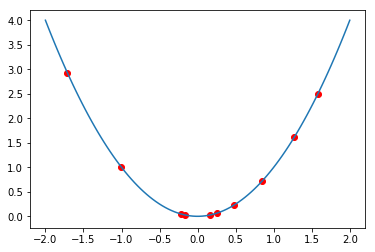

In [141]:
plt.plot(x,y);
y_fit = [func(i) for i in pop]
plt.scatter(pop, y_fit,c='r');


定义适应度，用于评估个体和种群的质量，因为我们希望找到最低点，所以用二次方函数加负号来表示，这样一来，越在山高处的点，适应度值越小，越在山低处的点，适应度值越大，质量越好。此外，如果对于-2和+2以外的点，设置为一个比较大的负数，以表示质量很差。

In [121]:
def fitness(x):
    if (x>2 or x<-2):  
        return -100
    else: 
        return -x**2


利用前面的函数计算出整体种群的质量

In [122]:

def fitness_pop(pop):
    return np.sum(fitness(x) for x in pop)/len(pop)

fitness_pop(pop)

-1.7311609764341587

质量高的优秀个体更容易存活和有下一代，为了体现这一点，我们将适应度转换为一个选择概率，以方便后续计算。

In [124]:
def fitness_prob(pop):
    return np.exp([fitness(x) for x in pop])/np.sum(np.exp([fitness(x) for x in pop]))

fitness_prob(pop)


array([0.02055009, 0.0127873 , 0.03558897, 0.30580228, 0.17240482,
       0.13704312, 0.013488  , 0.18353671, 0.08567397, 0.03312475])

定义杂交函数，对父代双亲进行加权求和，权重是一个随机值。

In [126]:

def crossover(p1,p2):
    weight = np.random.rand()
    p1_sub = p1*weight
    p2_sub = p2*(1-weight)
    children = p1_sub+p2_sub
    return children


定义变异函数，对某个X进行随机的加减，相当于对局部周围进行了随机搜索。

In [127]:

def mutate(p):
    step = np.random.randn()*0.1
    children = p+step
    return children


设置一些进化参数，有多少比例的个体会参与杂交，有多少会参与变异

In [128]:
# 进化参数
cross_rate = 0.8 # 杂交率
mut_rate = 0.1 # 变异率

开始遗传进化的循环操作。

In [136]:
# begin
pop_parent = pop
pop_fit = fitness_pop(pop_parent)

iter_num = 0
while iter_num < 10:
    pop_children  = pop_parent.copy()
    prob = fitness_prob(pop_children)  # 计算父群适应度概率
    parent1_num = int(cross_rate*num)  # 根据杂交概率计算杂交数量
    # 从个体中抽取待杂交基因编号
    cross_index = np.random.choice(num, parent1_num, replace=False) 
    for i in cross_index: # 待杂交个体和其它随机个体进行杂交
        pop_children[i] = crossover(pop_children[i], pop_children[int(np.random.choice(len(pop_children),1,p=prob))])

    mut_num = int(mut_rate*num) # 计算待变异基因数量
    mut_index = np.random.choice(num, mut_num,replace=False)  # 抽取待变异基因编号

    for i in mut_index:
        pop_children[i] = mutate(pop_children[i]) 
    # 上下双代合并排序
    pop_group = np.concatenate([pop_children,pop_parent])
    prob = fitness_prob(pop_group)
    next_index = np.argsort(prob)[-num:]
    pop_parent = pop_group[next_index] # 优秀的变成下一代
    pop_fit = fitness_pop(pop_children)
    print("第{n}代种群的适应度：{x:.3f}".format(n=iter_num, x=pop_fit))
    iter_num = iter_num + 1   # 进入下一轮

第0代种群的适应度：-1.373
第1代种群的适应度：-0.389
第2代种群的适应度：-0.094
第3代种群的适应度：-0.025
第4代种群的适应度：-0.018
第5代种群的适应度：-0.005
第6代种群的适应度：-0.004
第7代种群的适应度：-0.001
第8代种群的适应度：-0.001
第9代种群的适应度：-0.001


我们总共安排了10次迭代，也就是10次进化。每次进化分为三个步骤，第一个步骤是选出高质量的个体和其它个体进行杂交，第二个步骤是选出高质量的个体进行变异，第三步是将上一代和杂交变异后的下一代合并评估，找出质量较高的个体保留，进入下一轮进化。可以观察到每一轮进化得到的种群质量是不断提高的。

In [137]:
pop_children

array([-0.03408096, -0.03408096, -0.03408096, -0.03408096, -0.03408096,
       -0.03408096, -0.04162594, -0.03408096,  0.02211625,  0.00873233])

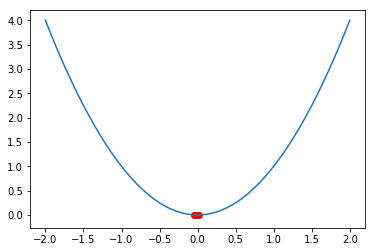

In [139]:
plt.plot(x,y);
pop_fit = [func(i) for i in pop_children]
plt.scatter(pop_children, pop_fit,c='r');


现在再来观察进化后的种群，所有的X都非常靠近0，可以认为种群进化成功，找到了环境的最优点，或者说二次方函数的最小值。

### 练习

使用上述的两种方法，去寻找sin函数在-10到+10之间的最小值在哪里。它的图形对应如下。

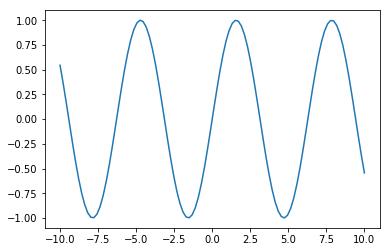

In [145]:
x = np.linspace(-10,10,100)
y = np.sin(x)
plt.plot(x,y);


提示一下，如果不知道sin函数对应的梯度函数，可以直接用sympy模块来计算，结果发现cos函数。

In [147]:
from sympy import Symbol, diff,sin
x = Symbol("x")
diff(sin(x),x)

cos(x)

受篇幅所限，我们只尝试梯度下降方法，遗传算法可以读者自行尝试。

In [1]:
def min_gred(x_start, rate, num, f,g):
    x = x_start
    for n in range(num):
        gx = g(x)
        y = f(x)
        x = x - rate*gx # 梯度下降
        print("X：{x:.2f}, Y：{y:.2f}，gx：{gx:.2f}".format(x=x, y=y,gx=gx))
        if abs(gx)<0.0001:
            break
    return x     

In [3]:
f = lambda x:np.sin(x)
g = lambda x:np.cos(x)

In [9]:
min_gred(0.1,0.2,20,f,g)

X：-0.10, Y：0.10，gx：1.00
X：-0.30, Y：-0.10，gx：1.00
X：-0.49, Y：-0.29，gx：0.96
X：-0.67, Y：-0.47，gx：0.88
X：-0.82, Y：-0.62，gx：0.79
X：-0.96, Y：-0.73，gx：0.68
X：-1.07, Y：-0.82，gx：0.57
X：-1.17, Y：-0.88，gx：0.48
X：-1.25, Y：-0.92，gx：0.39
X：-1.31, Y：-0.95，gx：0.32
X：-1.36, Y：-0.97，gx：0.26
X：-1.40, Y：-0.98，gx：0.21
X：-1.44, Y：-0.99，gx：0.17
X：-1.46, Y：-0.99，gx：0.13
X：-1.49, Y：-0.99，gx：0.11
X：-1.50, Y：-1.00，gx：0.09
X：-1.52, Y：-1.00，gx：0.07
X：-1.53, Y：-1.00，gx：0.05
X：-1.54, Y：-1.00，gx：0.04
X：-1.54, Y：-1.00，gx：0.04


-1.5426802075384614

可以观察到使用梯度下降方法，可以找到一个极小值，就是当x为-1.54的时候，y得到-1，在这个范围中sin函数有很多个极小值，如果需要算出其它极小值，你需要把初始值更改一下试试。

### 本课小结：
- 最优化是非常关键的AI技术之一，它将是后续学习机器学习的重要概念。最优化的目标就是找到函数的极值，本课是介绍找极小值，如果是找极大值只需要将函数加个负号即可。
- 梯度下降法是一种局部的最优化技术，它是利用了函数的导数特性，顺着地势低处走，可以快速找到某个极小值。
- 遗传算法是利用自然界物竞天择的思路，每一代中选择能适应环境的个体进入下一代，它是一种可以找到全局最优的方法，不过在速度上会略慢。